In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import matplotlib.image as mp

The training dataset consists of 60000 28x28px images of handwritten digits from 0 to 9.
The test dataset consists of 10000 28x28px images.

In [ ]:
# Load the data and seperates it into train and test data
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# size of train and test data
print("x_train : ",train_images.shape)
print("y_train : ",train_labels.shape)
print("x_test : ",test_images.shape)
print("y_test : ",test_labels.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


Gray scale images is consist of 1 byte i.e. 8 bits. 
That means teh pixel value range form 0 to 255.

Here is how each image in the dataset will look like. It is a 28x28 matrix of integers (from 0 to 255). Each integer representsa color.

In [ ]:
# One of the image in training data 
# Thus understanding how the image is stored in it 
pd.DataFrame(train_images[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Instead of using standard scaler for normalizing we try to divide teh value
# Since the range is from 0 to 255 , hence train and test images have to eb subjected to normalization. 
train_images=train_images/255
test_images=test_images/255

In [ ]:
# creating a sequential model
model=models.Sequential()
# Flattening teh image for example 28x28 images here 28 x 28 will be acted as neurons and act as input
# here we use grayscale image hence (28,28,1) i.e. 1 channel but if we want to use color images then we can use (28,28,3) i.e 3 channels
model.add(layers.Flatten(input_shape=(28,28,1)))
# Dense layer i.e. hidden layer
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(16,activation="relu"))
# Since we have 10 outputs from 0 to 9 in mnist handwritten digits dataset 
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
# compile the model
# adam
# sparse_categorical_crossentropy 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# To train the model 
# Epochs
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3953 - accuracy: 0.8871 - val_loss: 0.2228 - val_accuracy: 0.9346
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1892 - accuracy: 0.9457 - val_loss: 0.1639 - val_accuracy: 0.9517
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1444 - accuracy: 0.9569 - val_loss: 0.1460 - val_accuracy: 0.9572
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1173 - accuracy: 0.9651 - val_loss: 0.1341 - val_accuracy: 0.9594
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.1251 - val_accuracy: 0.9623
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0916 - accuracy: 0.9719 - val_loss: 0.1194 - val_accuracy: 0.9648
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.1223 - val_accuracy:

In [ ]:
# Model summary tells about how the model is working
# Sicne we have input as 28x28 = 784 hence we have shape as 784
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluation function to know the model score/accuracy
score = model.evaluate(test_images,test_labels)
print("Test score : ",score[0])
print("Test accuracy : ",score[1])

313/313 [==============================] - 0s 794us/step - loss: 0.1270 - accuracy: 0.9630
Test score :  0.12695148587226868
Test accuracy :  0.9629999995231628


In [ ]:
# Saving the model
model_name = 'digit_recognition.h5'
model.save(model_name, save_format='h5')

In [ ]:
# Loading the model
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
# Retrieving the predictions of model
predictions_one_hot = loaded_model.predict([test_images])

In [ ]:
# Printing the predictions shape
print('Predictions_one_hot: ',predictions_one_hot.shape)

Predictions_one_hot:  (10000, 10)


In [ ]:
# Let's extract predictions with highest probabilities and detedt what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot,axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
# Printing the first prediction
print(predictions[0])

7


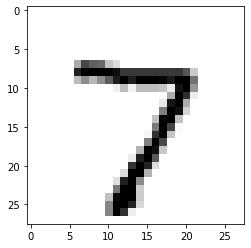

In [ ]:
# Displaying the image for the sme
plt.imshow(test_images[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()